# HR Analytics

In this project I will:
* Perform Exploratory Data Analysis
* Select the most important features for a classification model
* Pre-process the data for modelling use
* Score the classification model's prediction accuracy

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import HR Analytics data - Data sourced from https://www.kaggle.com/datasets/giripujar/hr-analytics

df = pd.read_csv('/Users/phillipgregory/Documents/Career/Data science/Kaggle Datasets/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## EDA

In [3]:
# Check for null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
# Describe data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Data types
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Create visualisations to detect which features contribute to an employee leaving

In [6]:
plt.style.use('seaborn-darkgrid')

left_df = df[df['left'] == 1]
remain_df = df[df['left'] == 0]

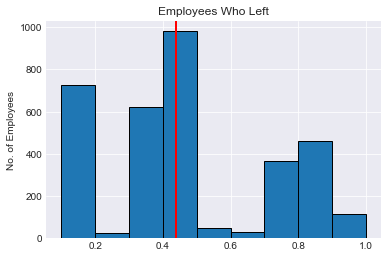

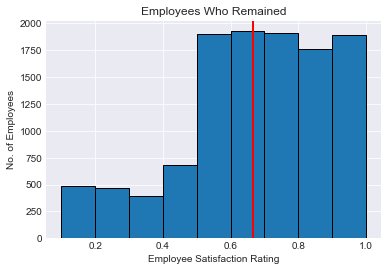

In [7]:
# How does employee satisfaction contribute to an employee leaving?
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
avg_sat_left = left_df['satisfaction_level'].mean()
avg_sat_remain = remain_df['satisfaction_level'].mean()

fig1, ax1 = plt.subplots(sharex=True)
fig1, ax2 = plt.subplots()

ax1.hist(x=left_df['satisfaction_level'], bins=bins, edgecolor='black')
ax2.hist(x=remain_df['satisfaction_level'], bins=bins, edgecolor='black')

ax1.axvline(avg_sat_left, color='red', label='Age Median', linewidth=2)
ax2.axvline(avg_sat_remain, color='red', label='Age Median', linewidth=2)

ax2.set_xlabel('Employee Satisfaction Rating')
ax1.set_ylabel('No. of Employees')
ax2.set_ylabel('No. of Employees')
ax1.set_title('Employees Who Left')
ax2.set_title('Employees Who Remained')

plt.show()

The above histograms demonstrate:
* Employees who leave tend to have a satisfaction rating of <0.5
* Some employees with satisfaction > 0.7 still left the company which indicates other contributing factors exist.
* Employees who remain tend to have a satisfaction rating of >0.5
* The mean satisfaction rating is higher for employees who remain
* This is an important feature in predicting employee retention

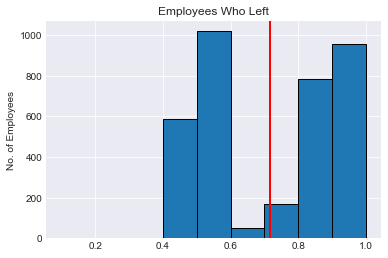

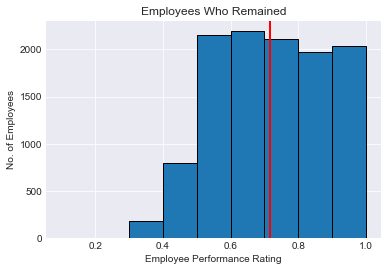

In [8]:
# How does employee performance contribute to an employee leaving?
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
avg_perf_left = left_df['last_evaluation'].mean()
avg_perf_remain = remain_df['last_evaluation'].mean()

fig1, ax1 = plt.subplots(sharex=True)
fig1, ax2 = plt.subplots()

ax1.hist(x=left_df['last_evaluation'], bins=bins, edgecolor='black')
ax2.hist(x=remain_df['last_evaluation'], bins=bins, edgecolor='black')

ax1.axvline(avg_perf_left, color='red', label='Age Median', linewidth=2)
ax2.axvline(avg_perf_remain, color='red', label='Age Median', linewidth=2)

ax2.set_xlabel('Employee Performance Rating')
ax1.set_ylabel('No. of Employees')
ax2.set_ylabel('No. of Employees')
ax1.set_title('Employees Who Left')
ax2.set_title('Employees Who Remained')

plt.show()

* Although most employees who left had a last evaluation rating of 0.4 - 0.6, over 1,500 employees with rating between 0.8 - 1.0 left the company.
* This suggests other features may be more important in predicting employee retention.
* Next I will analyse satisfaction and evaluation scores together as these are both continuous features.

Text(0.5, 1.0, 'Satisfaction & Performance Scatterplot')

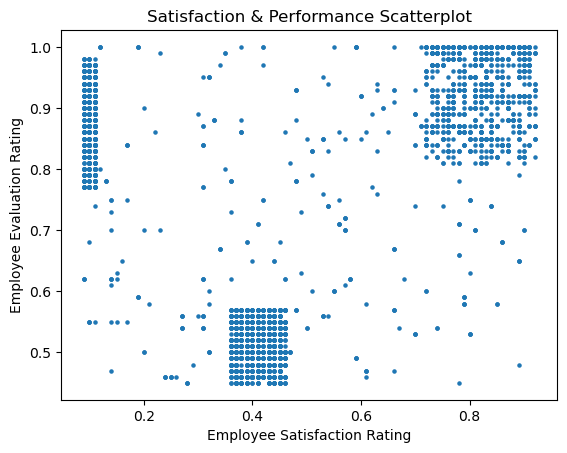

In [9]:
# Scatter plot of satisfaction and last evaluation score for employees who left
plt.style.use('default')

satisfaction = left_df['satisfaction_level']
last_eval = left_df['last_evaluation']
plt.scatter(satisfaction, last_eval, s=5)
plt.xlabel('Employee Satisfaction Rating')
plt.ylabel('Employee Evaluation Rating')
plt.title('Satisfaction & Performance Scatterplot')

Text(0.5, 1.0, 'Satisfaction & Performance Scatterplot')

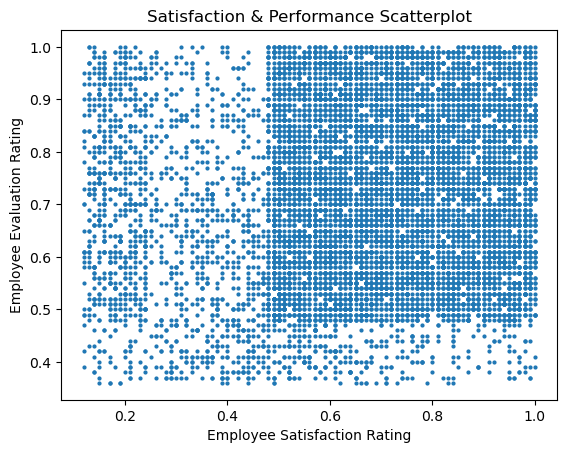

In [10]:
# Scatter plot of satisfaction and last evaluation score for employees who remained
satisfaction = remain_df['satisfaction_level']
last_eval = remain_df['last_evaluation']
plt.scatter(satisfaction, last_eval, s=4)
plt.xlabel('Employee Satisfaction Rating')
plt.ylabel('Employee Evaluation Rating')
plt.title('Satisfaction & Performance Scatterplot')

* The scatterplot of employees who left displays 3 clear clusters which I will analyse further.
* The scatterplot of remaining employees just shows a single cluster rating mostly to employees with a satisfaction > 0.5.

In [11]:
# Creating clusters for employees who left by satisfaction and performance
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

X = left_df[['satisfaction_level', 'last_evaluation']]
y_pred = km.fit_predict(X)
y_pred[:20]

array([0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1],
      dtype=int32)

/var/folders/wz/1k6yj9pn3kj1s5gppbqtnn280000gn/T/ipykernel_54370/1665850151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['cluster'] = y_pred


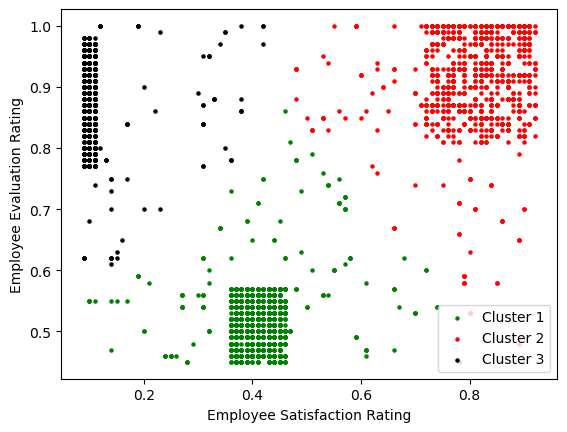

In [12]:
# Create a new column linking each customer to the relevant cluster an re-plot the scatter chart.
left_df['cluster'] = y_pred

df1 = left_df[left_df.cluster==0]
df2 = left_df[left_df.cluster==1]
df3 = left_df[left_df.cluster==2]
label = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.scatter(df1.satisfaction_level, df1.last_evaluation, color = 'green', s=5)
plt.scatter(df2.satisfaction_level, df2.last_evaluation, color= 'red', s=5)
plt.scatter(df3.satisfaction_level, df3.last_evaluation, color='black', s=5)

plt.xlabel('Employee Satisfaction Rating')
plt.ylabel('Employee Evaluation Rating')
plt.legend(label)

#### Cluster Analysis:
* Top right cluster relates to employees with a high satisfaction and high performance. Further analysis is required to determine why these employees left.
* Top left cluster relates to high performing but unsatisfied employees. This suggests these employees may have felt undervalued based on their performance.
* Bottom middle cluster relates to poor performance and poor satisfaction. It is less surprising that these employees opted to leave the company

Text(0.5, 1.0, 'Number of Employee Projects')

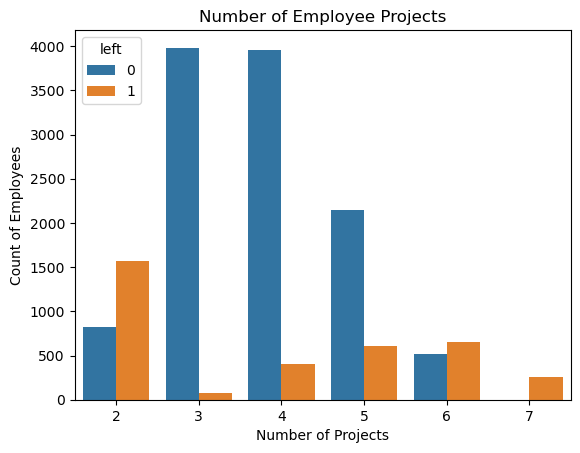

In [13]:
# How does number of projects contribute to an employee leaving?

sns.countplot(x=df['number_project'], hue=df.left)
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.title('Number of Employee Projects')

* Most employees who leave have only completed 2 projects.
* Employees who have completed more than 2 projects seem less likely to leave.

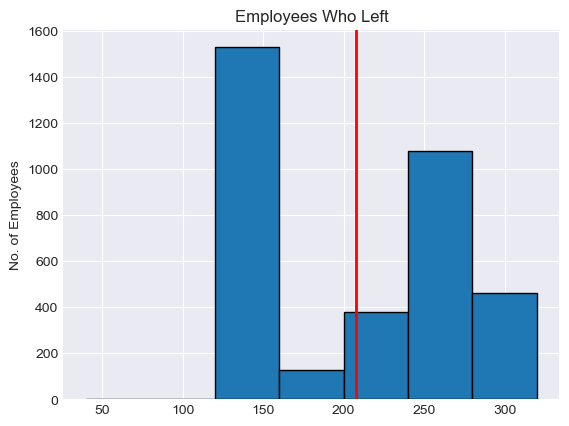

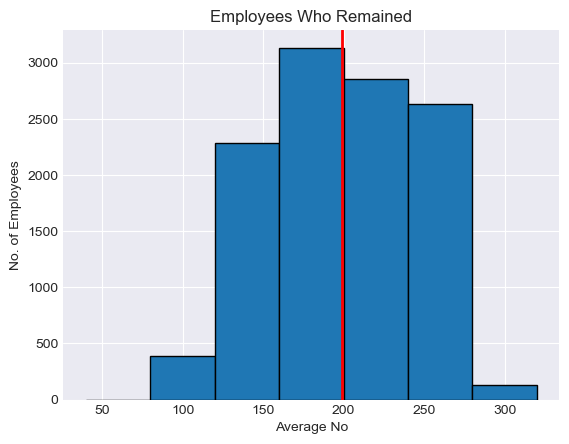

In [14]:
# How does average monthly hours contribute to an employee leaving?
plt.style.use('seaborn-darkgrid')
bins = [40, 80, 120, 160, 200, 240, 280, 320]
avg_hours_left = left_df['average_montly_hours'].mean()
avg_hours_remain = remain_df['average_montly_hours'].mean()

fig1, ax1 = plt.subplots(sharex=True)
fig1, ax2 = plt.subplots()

ax1.hist(x=left_df['average_montly_hours'], bins=bins, edgecolor='black')
ax2.hist(x=remain_df['average_montly_hours'], bins=bins, edgecolor='black')

ax1.axvline(avg_hours_left, color='red', label='Avg Hours Worked', linewidth=2)
ax2.axvline(avg_hours_remain, color='red', label='Avg Hours Worked', linewidth=2)

ax2.set_xlabel('Average No')
ax1.set_ylabel('No. of Employees')
ax2.set_ylabel('No. of Employees')
ax1.set_title('Employees Who Left')
ax2.set_title('Employees Who Remained')

plt.show()

* Above histograms indicate the average working hours per employee is around 200 hours both both groups.
* Most employees who left worked an average of 100-150 hours which indicates part time employees have a higher turnover rate.
* In contrast, there is also a higher turnover for employees working long hours 250+
* Hardly any employees working over 300 hours a month on average remained at the company.

Text(0.5, 1.0, 'Employee Turnover by Tenure')

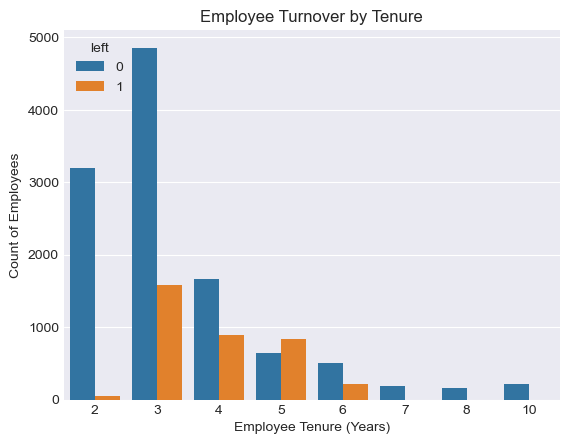

In [15]:
# Time spend company - How does employee tenure length impact turnover rate?
sns.countplot(data=df, x=df.time_spend_company, hue=df.left)
plt.xlabel('Employee Tenure (Years)')
plt.ylabel('Count of Employees')
plt.title('Employee Turnover by Tenure')

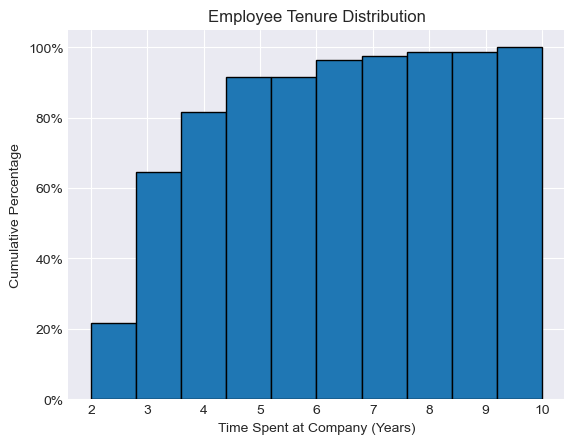

In [16]:
# Show distribution of employee tenures
from matplotlib.ticker import PercentFormatter

data = df.time_spend_company
plt.hist(data, weights=np.ones(len(data)) / len(data), edgecolor='black', cumulative=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Cumulative Percentage')
plt.title('Employee Tenure Distribution')
plt.show()

#### Findings from above two visuals
* Most employees who leave have a tenure of 3 years, followed by 4, 5, and 6 years.
* Employees with a tenure of 6+ years appear to remain at the company.
* Low turnover at 2 years tenure may relate to employees still seeking to move up the organisational hierarchy.
* At 3-6 years, employees who are unsatisfied/haven't achieved a promotion may be looking to leave. Investigate this further.
* As over 80% of employees have worked at the company for less than 5 years, the high turnover in this range could simply correlate to a larger data sample.

Text(0, 0.5, 'Count of Employees')

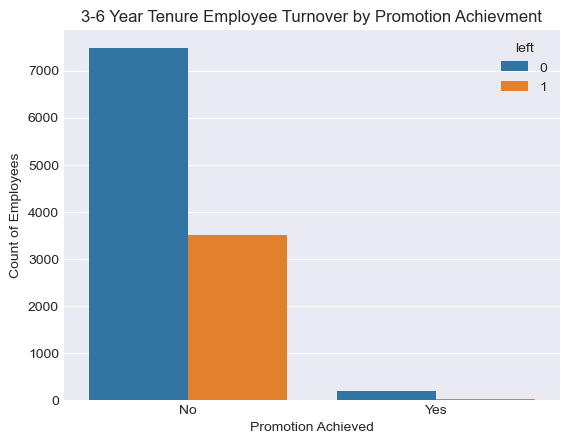

In [17]:
mask = (df['time_spend_company'] > 2) & (df['time_spend_company'] < 7)
tenure_3to6 = df.loc[mask]
sns.countplot(data=tenure_3to6, x=tenure_3to6.promotion_last_5years, hue=tenure_3to6.left)
plt.title('3-6 Year Tenure Employee Turnover by Promotion Achievment')
plt.xticks(ticks=tenure_3to6.promotion_last_5years.unique(), labels=['No', 'Yes'])
plt.xlabel('Promotion Achieved')
plt.ylabel('Count of Employees')

* Hardly any employees with a tenure of 3-6 years acheived a promotion.
* The few employees in this tenure range that did achieve a promotion remained at the company.

Text(0, 0.5, 'Count of Employees')

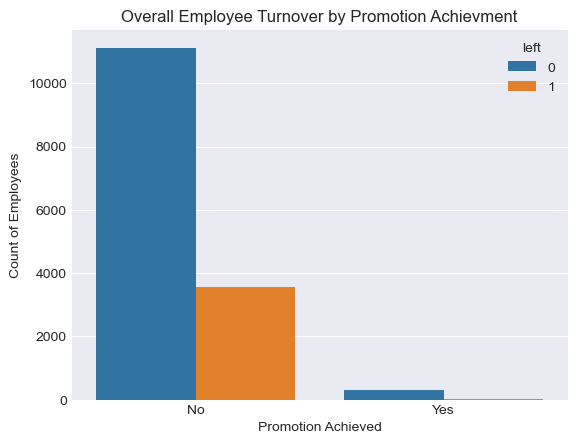

In [18]:
# Investigate employee promotions in general
sns.countplot(data=df, x=df.promotion_last_5years, hue=df.left)
plt.title('Overall Employee Turnover by Promotion Achievment')
plt.xticks(ticks=df.promotion_last_5years.unique(), labels=['No', 'Yes'])
plt.xlabel('Promotion Achieved')
plt.ylabel('Count of Employees')

In [19]:
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

* Only 319 out of 14,999 employees earnt a promotion.
* Again, employees that achieve promotion tend to remain at the company.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

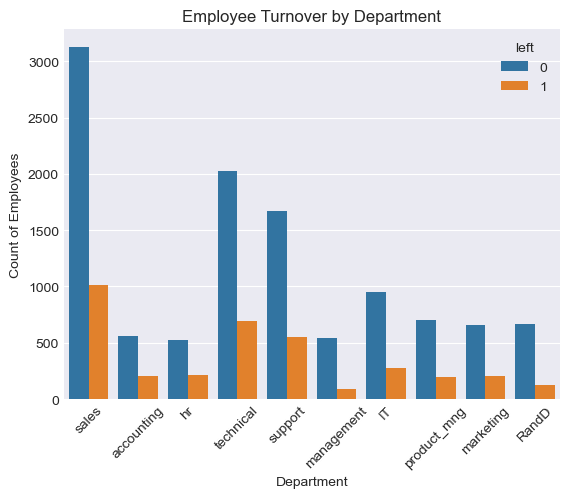

In [20]:
# Analyse employee turnover by department
sns.countplot(x=df.Department, hue=df.left)
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.title('Employee Turnover by Department')
plt.xticks(rotation=45)

In [21]:
# Percentage of leavers

for dept in df.Department.unique():
    dept_leavers = df[(df.Department == dept) & (df.left == 1)]
    dept_all = df[(df.Department == dept)]
    print(f"{dept} Percentage Left = {round(((dept_leavers.shape[0])/(dept_all.shape[0])* 100),2)}%")

sales Percentage Left = 24.49%
accounting Percentage Left = 26.6%
hr Percentage Left = 29.09%
technical Percentage Left = 25.62%
support Percentage Left = 24.9%
management Percentage Left = 14.44%
IT Percentage Left = 22.25%
product_mng Percentage Left = 21.95%
marketing Percentage Left = 23.66%
RandD Percentage Left = 15.37%


Text(0.5, 1.0, 'Departmental Turnover Percentages')

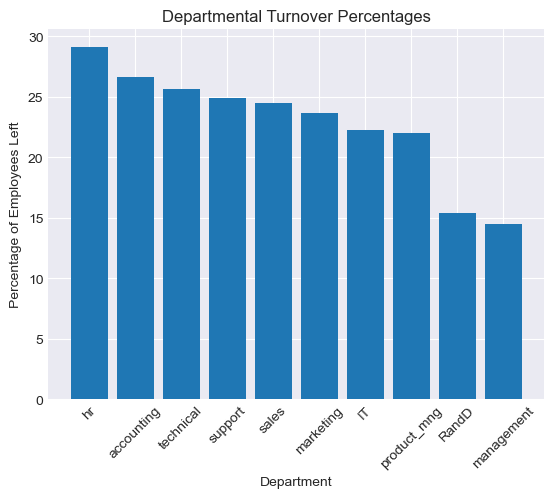

In [22]:
dept_left = []

for dept in df.Department.unique():
    dept_leavers = df[(df.Department == dept) & (df.left == 1)]
    dept_all = df[(df.Department == dept)]
    dept_left.append(round(((dept_leavers.shape[0])/(dept_all.shape[0])* 100),2))
    
dept_left_series = pd.Series(data=dept_left, index=df.Department.unique()).sort_values(ascending=False)
plt.bar(dept_left_series.index, dept_left_series)
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Percentage of Employees Left')
plt.title('Departmental Turnover Percentages')

* The "Employee Turnover by Department" chart shows most employees have left from sales. However, this is the department with the most employees so this isn't a very good measure.
* "Departmental Turnover Percentages" is a better measure as it shows turnover as a proportion.
* HR has the highest turnover rate at 29.09%
* Management has the lowest turnover rate at 14.44%

In [23]:
# Employee satisfaction by department
dept_sat_df = df.satisfaction_level.groupby(df['Department']).mean().sort_values(ascending=True)
dept_sat_df

Department
accounting     0.582151
hr             0.598809
technical      0.607897
sales          0.614447
IT             0.618142
support        0.618300
marketing      0.618601
product_mng    0.619634
RandD          0.619822
management     0.621349
Name: satisfaction_level, dtype: float64

* The above Series shows that departments with the highest turnover percentage also tend to have the lowest mean satsifaction rating.
* HR and accounting have the two lowest mean satisfaction ratings, and the highest turnover percentage.
* RandD and management have the two highest mean satisfaction ratings, and the lowest turnover percentage.

Text(0, 0.5, 'Count of Employees')

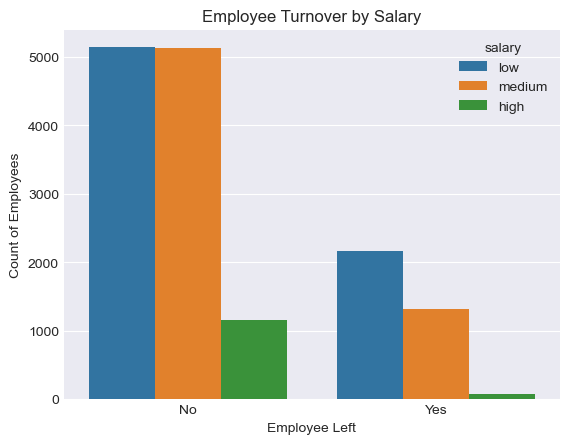

In [24]:
# Investigate how salary impacts turnover
sns.countplot(x=df.left, hue=df.salary)
plt.title('Employee Turnover by Salary')
plt.xlabel('Employee Left')
plt.xticks(ticks=df.left.unique(), labels=['Yes', 'No'])
plt.ylabel('Count of Employees')

* Employee turnover increases as salary decreases.
* Very few high salary employees left the company.

In [25]:
# Investigate work accidents
df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

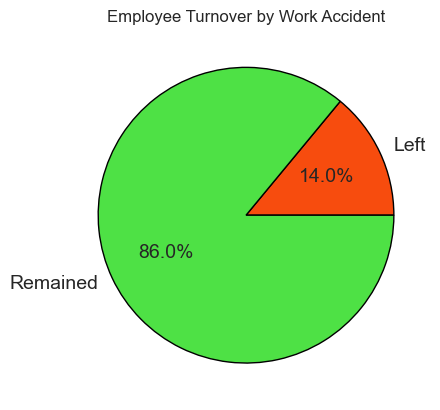

In [26]:
# Did having a work accident encourage customers to leave?
work_accident = df[df.Work_accident == 1]
no_work_accident = df[df.Work_accident == 0]

work_accident_left = round(work_accident.shape[0]/df.shape[0], 2)
work_accident_remained = round(no_work_accident.shape[0]/df.shape[0], 2)

slices = [work_accident_left, work_accident_remained]
labels = ['Left', 'Remained']

plt.pie(slices, labels=labels, wedgeprops=({'edgecolor':'black'}), 
        textprops={'fontsize':14}, colors=["#f74c0e", "#4ee145"], autopct='%1.1f%%')

plt.title('Employee Turnover by Work Accident')
plt.show()

* The pie chart shows the effect a work accident has on an employee leaving is negligible.

## Classification Model

To prepare the data, I will:
* Select the features that contribute most to employee turnover
* Encode categorical features

In [27]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [28]:
# Summarise data for leavers and remainers for numerical features
df.drop(['Department', 'salary'], axis=1).groupby(['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The above summary indicates important numerical features are:
* satisfaction_level: Employees who leave have a much lower satisfaction.
* average_monthly_hours: Employees who leave work on average longer hours.
* promotion_last_5years: Employees achieving promotion are likely to remain at the company.

Previous visualisations have indicated both categorical variables are important:
* Department: Percentage turnover in departments such as HR is higher than that in Management
* Salary: Employees with a high salary are much less likely to leave.

In [29]:
# Seperate chosen features from target variable
X = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'Department', 'salary']]
y = df.left

#### Encoding Categorical Variables
* Department has no order so I will encode this category with One Hot Encoding.
* Salary has an order, low to high, so I will use ordinal encoding for this.

In [30]:
# Create new encoded columns
salary_encoded = pd.Series(X['salary'].replace({'low':1, 'medium':2, 'high':3}))
department_encoded = pd.DataFrame(pd.get_dummies(X.Department))

In [31]:
# Drop un-encoded object columns from X
X_encoded = X.drop(['Department', 'salary'], axis=1)

In [32]:
# Concatenate newly encoded columns to original df
X_encoded = pd.concat([X_encoded, department_encoded, salary_encoded], axis=1)
X_encoded.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary
0,0.38,157,0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,262,0,0,0,0,0,0,0,0,1,0,0,2
2,0.11,272,0,0,0,0,0,0,0,0,1,0,0,2
3,0.72,223,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,159,0,0,0,0,0,0,0,0,1,0,0,1


In [33]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000)
log_reg_scores = cross_val_score(log_reg, X_encoded, y, cv=5, scoring='accuracy')

print(f"Logistic regression mean accuracy: {round((log_reg_scores.mean())*100,2)}%")

Logistic regression mean accuracy: 77.91%


In [34]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf_scores = cross_val_score(clf, X_encoded, y, cv=5, scoring='accuracy')

print(f"Random forest classifier mean accuracy: {round(clf_scores.mean()*100,2)}%")

Random forest classifier mean accuracy: 94.74%


## Conclusion
* In this project, I explored various features to assess how they contributed to employee turnover and visualised the results. 
* Using my findings, I selected the most important features for a classification model and encoded categorical columns accordingly.
* The random forest classifier model was best suited to this data, achieving an accuracy of around 95%.